In [31]:
from voidiness import voidy_analysis
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [9]:
# 12m 36.6s seconds to run. WOW
# filtered_sdss_dr16 = voidy_analysis('exported_dataFrames/voids.xlsx','exported_dataFrames/z_ra_dec_filtered_SDSS_DR16.xlsx') # commented out since its saved and it takes 13 minutes to run
sdss_dr16 = pd.read_excel('exported_dataFrames/sdss_dr16_w_voidiness.xlsx')


In [37]:

four_lac = voidy_analysis('exported_dataFrames/voids.xlsx','exported_dataFrames/z_ra_dec_filtered_4lac.xlsx' )
xray_agns = voidy_analysis('exported_dataFrames/voids.xlsx', 'exported_dataFrames/z_ra_dec_filtered_xray_agns.xlsx' )

In [6]:
# Saving so i don't have to wait 13 minutes for it to calculate
# This also takes 1m 35s to save. wow
# filtered_sdss_dr16.to_excel('exported_dataFrames/sdss_dr16_w_voidiness.xlsx')

In [11]:
# Base plotting code, the only thing we tweak is the data we're plotting.
# The bins and label

def custom_plot_hist(data, labels, bins):

    for dat, label, bin in zip(data, labels, bins):
        plt.hist([dat], 
            bins=bin, 
            histtype="step", 
            density=True, 
            stacked=False,
            label=label)
        
    plt.xlabel('Voidiness [$D_{\\rm Void}/D_{\\rm Total}$]')
    plt.ylabel('Normalized Fraction')
    plt.title('Voidiness Histogram')

    plt.grid()

    plt.legend()

    plt.text(0.5, 0.5, 'Preliminary',  # Adjust the position as needed
                fontsize=30, color='gray', alpha=0.5,
                ha='center', va='center', transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()


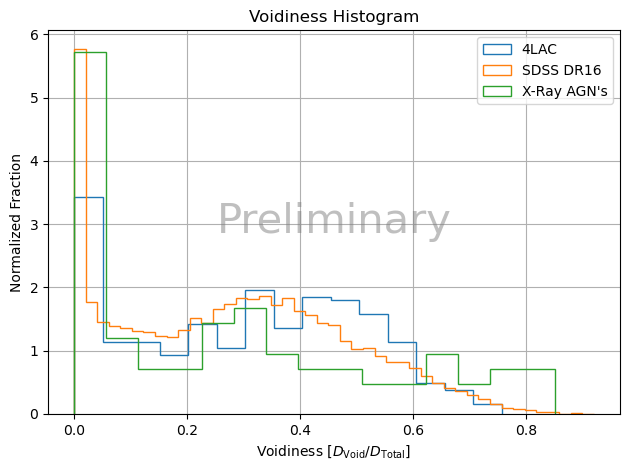

In [12]:
# Everything to be plotted on the histogram will be appended to the master lisst
# if something needs to be changed for a specific histogram, edit the relavent 
# bit of code
VOIDINESS_DATA = [] # list of panda series with voidiness data.
LABELS = []
BINS = []

# 4LAC DATA
VOIDINESS_DATA.append(four_lac.Voidiness)
LABELS.append("4LAC")
BINS.append(15)

# SDSS DR16 Optical Galaxies
VOIDINESS_DATA.append(sdss_dr16.Voidiness)
LABELS.append("SDSS DR16")
BINS.append(45)

# SDSS DR16 Optical Galaxies
VOIDINESS_DATA.append(xray_agns.Voidiness)
LABELS.append("X-Ray AGN's")
BINS.append(15)

custom_plot_hist(VOIDINESS_DATA, LABELS, BINS)


In [38]:
# Clean the data in the SED_class
for idx in list(four_lac.index):
    data = four_lac.SED_class[idx]
    if type(data) == str:
        four_lac.at[idx, 'SED_class'] = data[2:5] # Grabs the 3 characters, HSP ISP, LSP

In [54]:
# Plottinf just the 4lac distribution then filter by SED_class
# Since the data mixes strings with np.nans i need to do somthing a little messier
hsp_list = []
isp_list = []
lsp_list = []
nan_list = []
for i, _ in four_lac.iterrows():
    dat = four_lac.SED_class[i]
    if type(dat) == str:
        if dat == 'HSP':
            hsp_list.append(i)
        elif dat == 'ISP':
            isp_list.append(i)
        elif dat == 'LSP':
            lsp_list.append(i)
        else:
            Exception(f'Something went wrong. Dat = {dat}')
    elif np.isnan(dat): # last check to be sure
        nan_list.append(i)
    else:
        TypeError

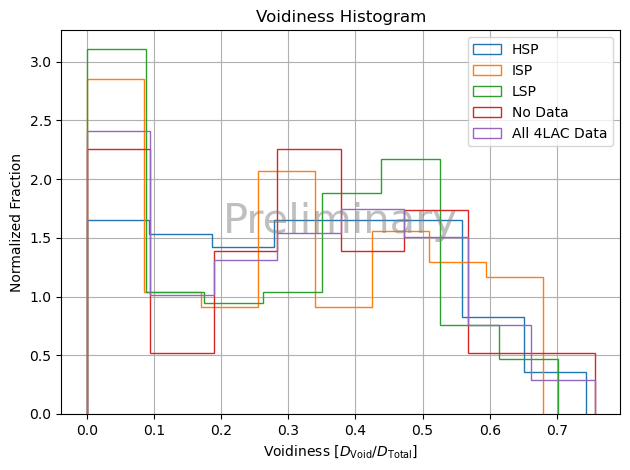

In [61]:
VOIDINESS_DATA = [] # list of panda series with voidiness data.
LABELS = []
BINS = []

# hsp
VOIDINESS_DATA.append(four_lac.Voidiness[hsp_list])
LABELS.append('HSP')
BINS.append(8)

# isp
VOIDINESS_DATA.append(four_lac.Voidiness[isp_list])
LABELS.append('ISP')
BINS.append(8)

# lsp
VOIDINESS_DATA.append(four_lac.Voidiness[lsp_list])
LABELS.append('LSP')
BINS.append(8)

# nan
VOIDINESS_DATA.append(four_lac.Voidiness[nan_list])
LABELS.append('No Data')
BINS.append(8)

# All
VOIDINESS_DATA.append(four_lac.Voidiness)
LABELS.append('All 4LAC Data')
BINS.append(8)

custom_plot_hist(VOIDINESS_DATA, LABELS, BINS)